In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../scripts/')
import warnings
warnings.filterwarnings('ignore')

from util import Util
from data_cleaner import DataCleaner
from model import Model
from preprocessor import Preprocessor
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

In [19]:
util = Util()
cleaner = DataCleaner()
processor = Preprocessor()

In [20]:
# read our merged train and test dataset

repo="https://github.com/Nathnael12/pharmaceutical-sales-pridiction.git"
# repo="../"


# complete_train=util.read_from_dvc("data/train.csv",repo,"train-v2",low_memory=False)
complete_train=util.read_from_file("../data/processed_raw.csv")




In [21]:
complete_train = cleaner.fill_zeros(complete_train, ['PromoInterval'])
complete_train = cleaner.convert_to_string(complete_train, ['PromoInterval'])
# sales_train = complete_train[complete_train['Open'] != 0 ]

In [22]:
# processed_csv=sales_train.copy()

In [23]:
# processed_csv = processor.prepare(sales_train)

In [24]:
# run this only for the first time
# processed_csv.to_csv('../data/processed.csv',index=False)

In [25]:
random_forest_args = {
    'n_estimators': 100,
    'max_depth': 16,
    'max_features': 'sqrt',
    'n_jobs': 4
}

In [26]:
modeling = Model(complete_train, RandomForestRegressor)

In [27]:
model, result = modeling.train(random_forest_args, 'random_forest_regressor')

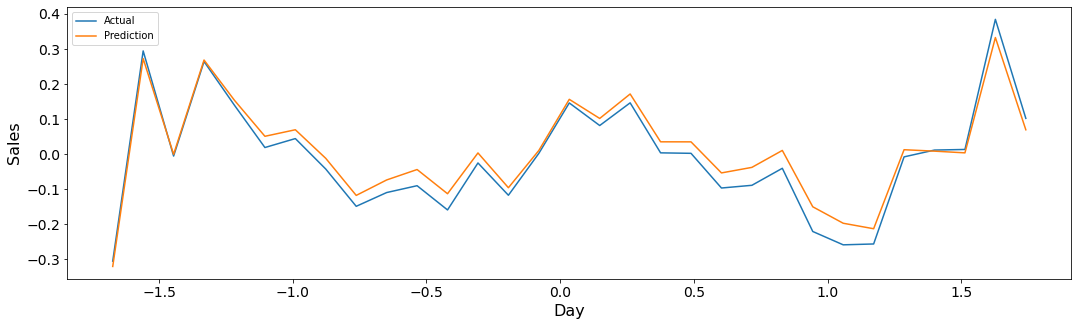

In [28]:
modeling.prediction_graph(result)

In [29]:
feat_imp = modeling.get_features_importance(model)

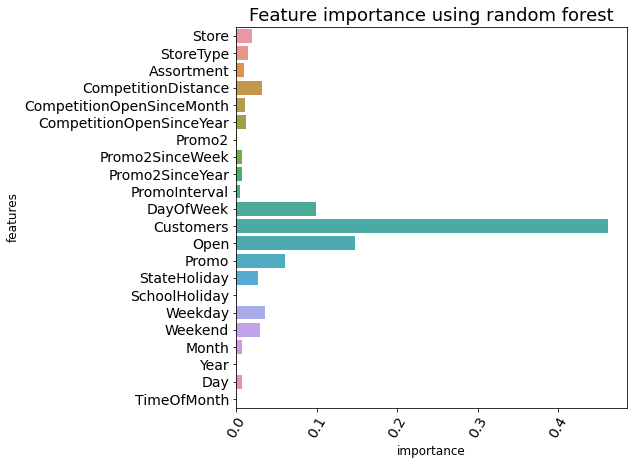

In [30]:
plt.figure(figsize=(7,7))
sns.barplot(data=feat_imp,  x="importance", y="features")
plt.title("Feature importance using random forest", size=18)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("importance", fontsize=12)
plt.ylabel("features", fontsize=12)
plt.show()

In [31]:
def serialize_model(model):
    
    path = "../models"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)

    if not isExist:
    # Create a new directory because it does not exist 
        os.makedirs(path)


    now = datetime.now()
    timestamp = now.strftime("%d-%m-%Y-%H-%M-%S")
    pickle.dump(model, open(f'{path}//{timestamp}.pkl', 'wb'))

serialize_model(model)